In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)  # es para enseñar todas las columnas del df
#pd.set_option('display.max_rows', None)     # es para enseñar todas las filas del df


import warnings
warnings.simplefilter('ignore')   # es para quitar warnings

## Cargo los archivos

#### Cargo tarjetas

In [ ]:
'''# Leo todos los csv de la parte de tarjetas

etudiant = pd.read_csv('../data/tarjetas/Validaciones_titulo_1020.csv', sep=';')
eleve = pd.read_csv('../data/tarjetas/Validaciones_titulo_1022.csv', sep=';')
ita = pd.read_csv('../data/tarjetas/Validaciones_titulo_1033.csv', sep=';')
pass_spsm = pd.read_csv('../data/tarjetas/Validaciones_titulo_3001.csv', sep=';')
pass_ecole_jardinage = pd.read_csv('../data/tarjetas/Validaciones_titulo_3002.csv', sep=';')
pass_baplm = pd.read_csv('../data/tarjetas/Validaciones_titulo_3003.csv', sep=';')
carte_employee = pd.read_csv('../data/tarjetas/Validaciones_titulo_6020.csv', sep=';')

# Concateno todos los dataframes de tarjetas

cards = pd.concat([etudiant, eleve, ita, pass_spsm, pass_ecole_jardinage, pass_baplm, carte_employee])

# Cambio los nombres de las columna sin espacios y a minusculas.

cards.columns=[c.lower().replace(' ', '_') for c in cards.columns]

# Convierto a csv los tarjetas

cards.to_csv('../data/pasajeros/cards.csv', sep=',', index=False)
'''

In [66]:
# Cargo los csv de tickets

cards = pd.read_csv('../data/pasajeros/cards.csv')

In [67]:
cards.head()

,date,card_number,operation,bus,machine,driver,settlement,route,route_name,line,line_name,waybill,stop,card_title,card_type,fare,fecha_inicio,fechacaducidad
0,2022-03-21 05:59:28.000,43230192,Entry validation,30064,5773,2114,AA01621,8,L8,203,AIN AOUDA-HIZB EL ES,AA09101,11670,1020,Etudiant,0.0,NaN,NaN
1,2022-03-21 06:03:51.000,18701088,Entry validation,30018,5828,1945,AA01567,38,L38,205,TAMESSNA-BAB EL HAD,AA08462,10429,1020,Etudiant,0.0,NaN,NaN
2,2022-03-21 06:18:53.000,2443413712,Entry validation,30292,5677,1611,AA01360,9,L9,102,KARIA-KAMRA,AA09919,10986,1020,Etudiant,0.0,NaN,NaN
3,2022-03-21 06:19:43.000,3472759179,Entry validation,30269,5723,2077,AA01558,303,L303,202,AIN AOUDA-CHIGA,AA08470,11846,1020,Etudiant,0.0,NaN,NaN
4,2022-03-21 06:19:48.000,3862394236,Entry validation,30158,5553,596,AA01767,8,L8,203,AIN AOUDA-HIZB EL ES,AA10900,11602,1020,Etudiant,0.0,NaN,NaN


#### Cargo tickets

In [5]:
'''# Leo todos los csv de la parte de tickets

lunes = pd.read_excel('../data/billetes/Billetes_21032022.xlsx')
martes = pd.read_excel('../data/billetes/Billetes_22032022.xlsx')
miercoles = pd.read_excel('../data/billetes/Billetes_23032022.xlsx')
jueves = pd.read_excel('../data/billetes/Billetes_24032022.xlsx')
viernes = pd.read_excel('../data/billetes/Billetes_25032022.xlsx')
sabado = pd.read_excel('../data/billetes/Billetes_26032022.xlsx')
domingo = pd.read_excel('../data/billetes/Billetes_27032022.xlsx')

# Función para modificar el nombre de las columnas

def rename_columns(lista):
    
    for file in lista:
        
        file.columns=[c.lower().replace(' ', '_') for c in file.columns]
    
    df = pd.concat([lunes, martes, miercoles, jueves, viernes, sabado, domingo])
    
    return df

# llamo a la función para modificar las columnas

dias = [lunes, martes, miercoles, jueves, viernes, sabado, domingo]

tickets = rename_columns(dias)

# Convierto a csv los tickets

tickets.to_csv('../data/pasajeros/tickets.csv', sep=',', index=False)'''



In [91]:
# Cargo los csv de tickets

tickets = pd.read_csv('../data/pasajeros/tickets.csv')

In [92]:
tickets.head()

,bus,conductor,maquina,liquidacion,fecha,tarifa,nombretarifa,precio,billete,linea,trayecto,parada
0,30037,8888,5573,AA01731,2022-03-21 00:02:31.000,1,ORDINAIRE,5000,AI26354,5,102,10069
1,30037,8888,5573,AA01731,2022-03-21 00:02:33.000,1,ORDINAIRE,5000,AI26355,5,102,10069
2,30037,8888,5573,AA01731,2022-03-21 00:02:34.000,1,ORDINAIRE,5000,AI26356,5,102,10069
3,30037,8888,5573,AA01731,2022-03-21 00:02:36.000,1,ORDINAIRE,5000,AI26357,5,102,10069
4,30037,8888,5573,AA01731,2022-03-21 00:02:37.000,1,ORDINAIRE,5000,AI26358,5,102,10069


#### Cargo Topologia

In [8]:
'''# Cargo el archivo de topologia

topologia = pd.read_csv('../data/red_transporte/topologia.csv')

# Modificio las columnas a minusculas y sin espacios.

topologia.columns=[c.lower().replace(' ', '_') for c in topologia.columns]

# Convierto a csv los tickets

topologia.to_csv('../data/pasajeros/topologia.csv', sep=',', index=False)
'''

In [15]:
# Cargo el archivo de topologia

topologia = pd.read_csv('../data/pasajeros/topologia.csv')

In [16]:
topologia.head()

,route_code_gmv,route,route_name,line_code,line_name,stop_order,stop_code_gmv,stop_name,stop_code_alsa,latitude,longitude
0,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,1,10005,Bab Chellah,73006,"34,02329786","-6,834576334"
1,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,2,10007,Bab Mellah,73008,"34,02500069","-6,829615092"
2,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,3,10044,Bab Khmiss,73046,"34,03663288","-6,817232328"
3,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,4,10046,Diar,73048,"34,04143426","-6,816443938"
4,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,5,10048,Mkinsiya,73050,"34,04413576","-6,817705018"


## Limpieza de datos

#### Limpieza Cards

In [68]:
# Elimino las columnas que no quiero

cards = cards.drop(['fecha_inicio', 'fechacaducidad'], axis=1)

In [69]:
# Elimino las columnas que no quiero

cards = cards.drop(['card_title', 'waybill', 'route_name', 'line_name' ], axis=1)

In [70]:
# Cambio el formato a de fecha a datetime64

cards.date = cards.date.astype('datetime64[ns]')

In [71]:
# Me quedo con fecha inferiores al '2022-03-28'

cards =cards[cards.date < '2022-03-28']

In [72]:
# Modifico el nombre de las columnas

columnas = {'card_number': 'ticket_number', 'route': 'route_code', 'line': 'line_code', 'stop': 'stop_code', 'card_type': 'operation_type'}

cards = cards.rename(columns=columnas)

In [73]:
# Ordeno las columnas

column_names = ["date", "bus", "machine", "driver", "settlement", "ticket_number", "operation", "operation_type", "fare", "route_code", "line_code", "stop_code"]

cards = cards.reindex(columns=column_names)

In [74]:
# Cambio el tipo de dato 'ticket_number' a object

cards = cards.astype({'ticket_number': 'object'})

In [78]:
# Me quedo solo con Validaciones y Transfers

cards = cards[(cards.operation == 'Entry validation') | (cards.operation == 'Transfer (entry)')]

# Modifico lo valores de valores a Validation y Transfer

cards.operation.replace('Entry validation', 'Validation', inplace=True)
cards.operation.replace('Transfer (entry)', 'Transfer', inplace=True)


In [79]:
cards.head()

,date,bus,machine,driver,settlement,ticket_number,operation,operation_type,fare,route_code,line_code,stop_code
0,2022-03-21 05:59:28,30064,5773,2114,AA01621,43230192,Validation,Etudiant,0.0,8,203,11670
1,2022-03-21 06:03:51,30018,5828,1945,AA01567,18701088,Validation,Etudiant,0.0,38,205,10429
2,2022-03-21 06:18:53,30292,5677,1611,AA01360,2443413712,Validation,Etudiant,0.0,9,102,10986
3,2022-03-21 06:19:43,30269,5723,2077,AA01558,3472759179,Validation,Etudiant,0.0,303,202,11846
4,2022-03-21 06:19:48,30158,5553,596,AA01767,3862394236,Validation,Etudiant,0.0,8,203,11602


In [80]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229258 entries, 0 to 1269680
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            229258 non-null  datetime64[ns]
 1   bus             229258 non-null  int64         
 2   machine         229258 non-null  int64         
 3   driver          229258 non-null  int64         
 4   settlement      229258 non-null  object        
 5   ticket_number   229258 non-null  object        
 6   operation       229258 non-null  object        
 7   operation_type  229258 non-null  object        
 8   fare            229258 non-null  float64       
 9   route_code      229258 non-null  int64         
 10  line_code       229258 non-null  int64         
 11  stop_code       229258 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 22.7+ MB


#### Limpieza Tickets

In [94]:
# Sustituyo el tipo de tarifa a object y como Ticket

tickets.tarifa.replace(1, 'Ticket', inplace=True)

In [95]:
# Renombro las columnas

columnas2 = {'conductor': 'driver', 'maquina': 'machine', 'liquidacion': 'settlement', 'fecha': 'date', 'tarifa': 'operation_type', 'nombretarifa': 'operation', 'precio': 'fare', 'billete': 'ticket_number', 'linea': 'route_code', 'trayecto': 'line_code', 'parada': 'stop_code'}

tickets = tickets.rename(columns=columnas2)

In [96]:
# Ordeno las columnas

column_names = ["date", "bus", "machine", "driver", "settlement", "ticket_number", "operation", "operation_type", "fare", "route_code", "line_code", "stop_code"]

tickets = tickets.reindex(columns=column_names)

In [97]:
# Cambio el formato de fecha a datetime64

tickets.date = tickets.date.astype('datetime64[ns]')

In [98]:
# Cambio el tipo de dato 'ticket_number' a object

tickets = tickets.astype({'fare': 'float64'})

In [99]:
# Modifico el precio de los billetes

tickets.fare.replace({5000 : 5.0, 10000: 10.0, 25000 : 25.0}, inplace=True)

In [101]:
tickets.head()

,date,bus,machine,driver,settlement,ticket_number,operation,operation_type,fare,route_code,line_code,stop_code
0,2022-03-21 00:02:31,30037,5573,8888,AA01731,AI26354,ORDINAIRE,Ticket,5.0,5,102,10069
1,2022-03-21 00:02:33,30037,5573,8888,AA01731,AI26355,ORDINAIRE,Ticket,5.0,5,102,10069
2,2022-03-21 00:02:34,30037,5573,8888,AA01731,AI26356,ORDINAIRE,Ticket,5.0,5,102,10069
3,2022-03-21 00:02:36,30037,5573,8888,AA01731,AI26357,ORDINAIRE,Ticket,5.0,5,102,10069
4,2022-03-21 00:02:37,30037,5573,8888,AA01731,AI26358,ORDINAIRE,Ticket,5.0,5,102,10069


In [102]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251553 entries, 0 to 1251552
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1251553 non-null  datetime64[ns]
 1   bus             1251553 non-null  int64         
 2   machine         1251553 non-null  int64         
 3   driver          1251553 non-null  int64         
 4   settlement      1251553 non-null  object        
 5   ticket_number   1251553 non-null  object        
 6   operation       1251553 non-null  object        
 7   operation_type  1251553 non-null  object        
 8   fare            1251553 non-null  float64       
 9   route_code      1251553 non-null  int64         
 10  line_code       1251553 non-null  int64         
 11  stop_code       1251553 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 114.6+ MB


#### Concateno los dataframes

In [103]:
# Concateno todos los dataframes de billetes y tarjetas

passengers = pd.concat([tickets, cards])


In [109]:
# Convierto a csv los tarjetas

passengers.to_csv('../data/pasajeros/passengers.csv', sep=',', index=False)


#### Topologia

In [116]:
topologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   route_code_gmv  2693 non-null   int64 
 1   route           2693 non-null   object
 2   route_name      2654 non-null   object
 3   line_code       2693 non-null   int64 
 4   line_name       2690 non-null   object
 5   stop_order      2693 non-null   int64 
 6   stop_code_gmv   2693 non-null   int64 
 7   stop_name       2693 non-null   object
 8   stop_code_alsa  2693 non-null   int64 
 9   latitude        2693 non-null   object
 10  longitude       2693 non-null   object
dtypes: int64(5), object(6)
memory usage: 231.6+ KB


In [115]:
topologia.head()

,route_code_gmv,route,route_name,line_code,line_name,stop_order,stop_code_gmv,stop_name,stop_code_alsa,latitude,longitude
0,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,1,10005,Bab Chellah,73006,"34,02329786","-6,834576334"
1,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,2,10007,Bab Mellah,73008,"34,02500069","-6,829615092"
2,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,3,10044,Bab Khmiss,73046,"34,03663288","-6,817232328"
3,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,4,10046,Diar,73048,"34,04143426","-6,816443938"
4,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,5,10048,Mkinsiya,73050,"34,04413576","-6,817705018"


In [118]:
# Renombro las columnas

columnas3 = {'route_code_gmv': 'route_code', 'route': 'route_name', 'route_name': 'route_name_int', 'stop_code_gmv': 'stop_code', 'stop_code_alsa': 'stop_code_int'}


In [119]:
topologia = topologia.rename(columns=columnas3)

In [120]:
topologia.head()

,route_code,route_name,route_name_int,line_code,line_name,stop_order,stop_code,stop_name,stop_code_int,latitude,longitude
0,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,1,10005,Bab Chellah,73006,"34,02329786","-6,834576334"
1,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,2,10007,Bab Mellah,73008,"34,02500069","-6,829615092"
2,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,3,10044,Bab Khmiss,73046,"34,03663288","-6,817232328"
3,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,4,10046,Diar,73048,"34,04143426","-6,816443938"
4,1,L1,L1 BAB CHELLAH-DOHA,103,BAB CHALLEH-DOHA,5,10048,Mkinsiya,73050,"34,04413576","-6,817705018"


#### Joins entre tablas

In [122]:
passengers.head()

,date,bus,machine,driver,settlement,ticket_number,operation,operation_type,fare,route_code,line_code,stop_code
0,2022-03-21 00:02:31,30037,5573,8888,AA01731,AI26354,ORDINAIRE,Ticket,5.0,5,102,10069
1,2022-03-21 00:02:33,30037,5573,8888,AA01731,AI26355,ORDINAIRE,Ticket,5.0,5,102,10069
2,2022-03-21 00:02:34,30037,5573,8888,AA01731,AI26356,ORDINAIRE,Ticket,5.0,5,102,10069
3,2022-03-21 00:02:36,30037,5573,8888,AA01731,AI26357,ORDINAIRE,Ticket,5.0,5,102,10069
4,2022-03-21 00:02:37,30037,5573,8888,AA01731,AI26358,ORDINAIRE,Ticket,5.0,5,102,10069


In [124]:
topologia.set_index(['route_code', 'line_code', 'line_code']).head()

route_name       route_name_int  \
route_code line_code line_code                                   
1          103       103               L1  L1 BAB CHELLAH-DOHA   
                     103               L1  L1 BAB CHELLAH-DOHA   
                     103               L1  L1 BAB CHELLAH-DOHA   
                     103               L1  L1 BAB CHELLAH-DOHA   
                     103               L1  L1 BAB CHELLAH-DOHA   

                                       line_name  stop_order  stop_code  \
route_code line_code line_code                                            
1          103       103        BAB CHALLEH-DOHA           1      10005   
                     103        BAB CHALLEH-DOHA           2      10007   
                     103        BAB CHALLEH-DOHA           3      10044   
                     103        BAB CHALLEH-DOHA           4      10046   
                     103        BAB CHALLEH-DOHA           5      10048   

                                  stop_name  stop_code_int     latitude  \
route_code line_code line_code                                            
1          103       103        Bab Chellah          73006  34,02329786   
                     103         Bab Mellah          73008  34,02500069   
                     103         Bab Khmiss          73046  34,03663288   
                     103               Diar          73048  34,04143426   
                     103           Mkinsiya          73050  34,04413576   

                                   longitude  
route_code line_code line_code                
1          103       103        -6,834576334  
                     103        -6,829615092  
                     103        -6,817232328  
                     103        -6,816443938  
                     103        -6,817705018

In [125]:
passengers.set_index(['route_code', 'line_code', 'line_code'])

date    bus  machine  driver  \
route_code line_code line_code                                               
5          102       102       2022-03-21 00:02:31  30037     5573    8888   
                     102       2022-03-21 00:02:33  30037     5573    8888   
                     102       2022-03-21 00:02:34  30037     5573    8888   
                     102       2022-03-21 00:02:36  30037     5573    8888   
                     102       2022-03-21 00:02:37  30037     5573    8888   
...                                            ...    ...      ...     ...   
4          103       103       2022-03-27 21:32:29  30173     5830    2194   
3          102       102       2022-03-27 21:36:03  30137     5761    2152   
24         102       102       2022-03-27 21:39:09  30153     5811    2080   
                     102       2022-03-27 21:39:28  30153     5811    2080   
25         102       102       2022-03-27 21:43:06  30083     5666     425   

                               settlement ticket_number   operation  \
route_code line_code line_code                                        
5          102       102          AA01731       AI26354   ORDINAIRE   
                     102          AA01731       AI26355   ORDINAIRE   
                     102          AA01731       AI26356   ORDINAIRE   
                     102          AA01731       AI26357   ORDINAIRE   
                     102          AA01731       AI26358   ORDINAIRE   
...                                   ...           ...         ...   
4          103       103          AA01497     754745274  Validation   
3          102       102          AA01558    2467997083  Validation   
24         102       102          AA01512     754657514  Validation   
                     102          AA01512     754371914  Validation   
25         102       102          AA01355     754075898  Validation   

                                operation_type  fare  stop_code  
route_code line_code line_code                                   
5          102       102                Ticket   5.0      10069  
                     102                Ticket   5.0      10069  
                     102                Ticket   5.0      10069  
                     102                Ticket   5.0      10069  
                     102                Ticket   5.0      10069  
...                                        ...   ...        ...  
4          103       103        CARTE EMPLOYEE   0.0      10008  
3          102       102        CARTE EMPLOYEE   0.0      10052  
24         102       102        CARTE EMPLOYEE   0.0      11364  
                     102        CARTE EMPLOYEE   0.0      11364  
25         102       102        CARTE EMPLOYEE   0.0      11372  

[1480811 rows x 10 columns]

In [129]:
topologia[['route_code', 'line_code', 'line_code', 'route_name', 'line_name', 'stop_order', 'stop_name', 'latitude', 'longitude']]

,route_code,line_code,line_code,route_name,line_name,stop_order,stop_name,latitude,longitude
0,1,103,103,L1,BAB CHALLEH-DOHA,1,Bab Chellah,"34,02329786","-6,834576334"
1,1,103,103,L1,BAB CHALLEH-DOHA,2,Bab Mellah,"34,02500069","-6,829615092"
2,1,103,103,L1,BAB CHALLEH-DOHA,3,Bab Khmiss,"34,03663288","-6,817232328"
3,1,103,103,L1,BAB CHALLEH-DOHA,4,Diar,"34,04143426","-6,816443938"
4,1,103,103,L1,BAB CHALLEH-DOHA,5,Mkinsiya,"34,04413576","-6,817705018"
...,...,...,...,...,...,...,...,...,...
2688,906,201,201,L40,AIN AOUDA_CENTRE OUM,1,AIN OUDA-V,"33,79965753","-6,788603346"
2689,906,201,201,L40,AIN AOUDA_CENTRE OUM,2,HAY PAM-V,"33,80196827","-6,789165991"
2690,906,201,201,L40,AIN AOUDA_CENTRE OUM,3,DAYA-V,"33,80617321","-6,790358889"
2691,906,201,201,L40,AIN AOUDA_CENTRE OUM,4,BACHAWEYA1-V,"33,80906321","-6,79126187"


In [133]:
# Hago un left join entre 'passengers'  y 'topologia' para obtener 'route_name', 'line_name', 'stop_order', 'stop_name', 'latitude', 'longitude' 


passanger_loc = passengers.set_index(['route_code', 'line_code', 'stop_code']).join(topologia[['route_code', 'line_code', 'stop_code', 'route_name', 'line_name', 'stop_order', 'stop_name', 'latitude', 'longitude']].set_index(['route_code', 'line_code', 'stop_code']))


In [136]:
passanger_loc.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1498343 entries, (1, 103, 10005) to (906, 201, 11629)
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1498343 non-null  datetime64[ns]
 1   bus             1498343 non-null  int64         
 2   machine         1498343 non-null  int64         
 3   driver          1498343 non-null  int64         
 4   settlement      1498343 non-null  object        
 5   ticket_number   1498343 non-null  object        
 6   operation       1498343 non-null  object        
 7   operation_type  1498343 non-null  object        
 8   fare            1498343 non-null  float64       
 9   route_name      1414810 non-null  object        
 10  line_name       1414810 non-null  object        
 11  stop_order      1414810 non-null  float64       
 12  stop_name       1414810 non-null  object        
 13  latitude        1414810 non-null  object        

In [138]:
passanger_loc.isnull()

date    bus  machine  driver  settlement  \
route_code line_code stop_code                                              
1          103       10005      False  False    False   False       False   
                     10005      False  False    False   False       False   
                     10005      False  False    False   False       False   
                     10005      False  False    False   False       False   
                     10005      False  False    False   False       False   
...                               ...    ...      ...     ...         ...   
906        101       12041      False  False    False   False       False   
                     12041      False  False    False   False       False   
                     12041      False  False    False   False       False   
           201       11629      False  False    False   False       False   
                     11629      False  False    False   False       False   

                                ticket_number  operation  operation_type  \
route_code line_code stop_code                                             
1          103       10005              False      False           False   
                     10005              False      False           False   
                     10005              False      False           False   
                     10005              False      False           False   
                     10005              False      False           False   
...                                       ...        ...             ...   
906        101       12041              False      False           False   
                     12041              False      False           False   
                     12041              False      False           False   
           201       11629              False      False           False   
                     11629              False      False           False   

                                 fare  route_name  line_name  stop_order  \
route_code line_code stop_code                                             
1          103       10005      False       False      False       False   
                     10005      False       False      False       False   
                     10005      False       False      False       False   
                     10005      False       False      False       False   
                     10005      False       False      False       False   
...                               ...         ...        ...         ...   
906        101       12041      False       False      False       False   
                     12041      False       False      False       False   
                     12041      False       False      False       False   
           201       11629      False       False      False       False   
                     11629      False       False      False       False   

                                stop_name  latitude  longitude  
route_code line_code stop_code                                  
1          103       10005          False     False      False  
                     10005          False     False      False  
                     10005          False     False      False  
                     10005          False     False      False  
                     10005          False     False      False  
...                                   ...       ...        ...  
906        101       12041          False     False      False  
                     12041          False     False      False  
                     12041          False     False      False  
           201       11629          False     False      False  
                     11629          False     False      False  

[1498343 rows x 15 columns]

In [139]:
# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [140]:
# Funcion que chequea los valores nulos y devuelve un histograma con ellos en forma de mapa de calor

def check_nan(df):
    
    nan_cols=df.isna().mean() * 100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(df.isna(),  
                yticklabels=False,
                cmap='viridis',
                cbar=False)
    
    plt.show();

'N nan cols: 6'

route_name    5.575025
line_name     5.575025
stop_order    5.575025
stop_name     5.575025
latitude      5.575025
longitude     5.575025
dtype: float64

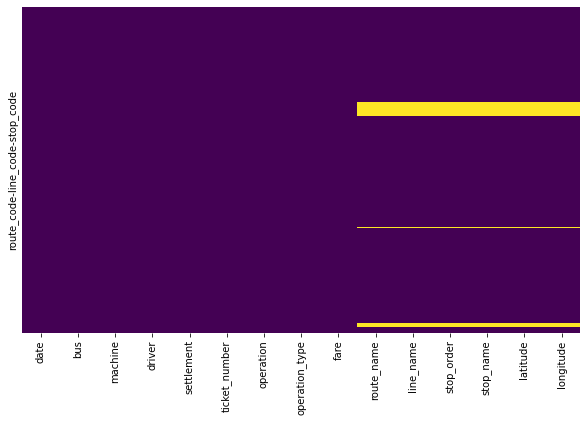

In [141]:
check_nan(passanger_loc)